# Clustering - Modeling

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
# import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)


from sklearn.cluster import KMeans
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


Make the thing

Fit the thing

Use the thing

## Iris Dataset

In [2]:
# import iris data

from pydataset import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename the columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


1. Clustering with the Iris Dataset

    Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.

    b. Visualize the results of your clustering.

    c. Use the elbow method to visually select a good value for k.

    d. Repeat the clustering, this time with 3 different features.

In [4]:
# define the independent variables for k-means

X = iris[['sepal_width', 'petal_length']]
X.head()

,sepal_width,petal_length
1,3.5,1.4
2,3.0,1.4
3,3.2,1.3
4,3.1,1.5
5,3.6,1.4


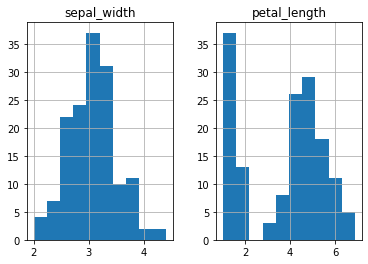

In [5]:
# look at distribution of the independent variables chosen

X.hist();

In [161]:
# Scale the X before modeling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()


,sepal_width,petal_length,petal_width
1,1.019004,-1.340227,-1.315444
2,-0.131979,-1.340227,-1.315444
3,0.328414,-1.397064,-1.315444
4,0.098217,-1.283389,-1.315444
5,1.249201,-1.340227,-1.315444


In [7]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose = 1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

Initialization complete
Iteration 0, inertia 117.09128060247045
Iteration 1, inertia 88.64354782048348
Iteration 2, inertia 82.60249277184619
Iteration 3, inertia 78.79764875499048
Iteration 4, inertia 76.57146161708651
Iteration 5, inertia 75.80897150559994
Iteration 6, inertia 75.51903605807848
Iteration 7, inertia 75.28060206611225
Iteration 8, inertia 75.20899209477426
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 108.77305864637275
Iteration 1, inertia 88.11527471175279
Iteration 2, inertia 82.60249277184619
Iteration 3, inertia 78.79764875499048
Iteration 4, inertia 76.57146161708651
Iteration 5, inertia 75.80897150559994
Iteration 6, inertia 75.51903605807848
Iteration 7, inertia 75.28060206611225
Iteration 8, inertia 75.20899209477426
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 109.58577984359212
Iteration 1, inertia 76.06406545415402
Iteration 2, inertia 75.9478037066799
Iteration 3, in

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [9]:
# look at a sample of iris
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
42,4.5,2.3,1.3,0.3,setosa,2
91,5.5,2.6,4.4,1.2,versicolor,2
108,7.3,2.9,6.3,1.8,virginica,0
43,4.4,3.2,1.3,0.2,setosa,1
53,6.9,3.1,4.9,1.5,versicolor,0
4,4.6,3.1,1.5,0.2,setosa,1
81,5.5,2.4,3.8,1.1,versicolor,2
117,6.5,3.0,5.5,1.8,virginica,0
50,5.0,3.3,1.4,0.2,setosa,1
145,6.7,3.3,5.7,2.5,virginica,0


In [10]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.01052328,  0.84485677],
       [ 0.90625492, -1.30310821],
       [-1.18603836,  0.27964014]])

In [11]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_length
0,0.010523,0.844857
1,0.906255,-1.303108
2,-1.186038,0.279640


In [12]:
# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

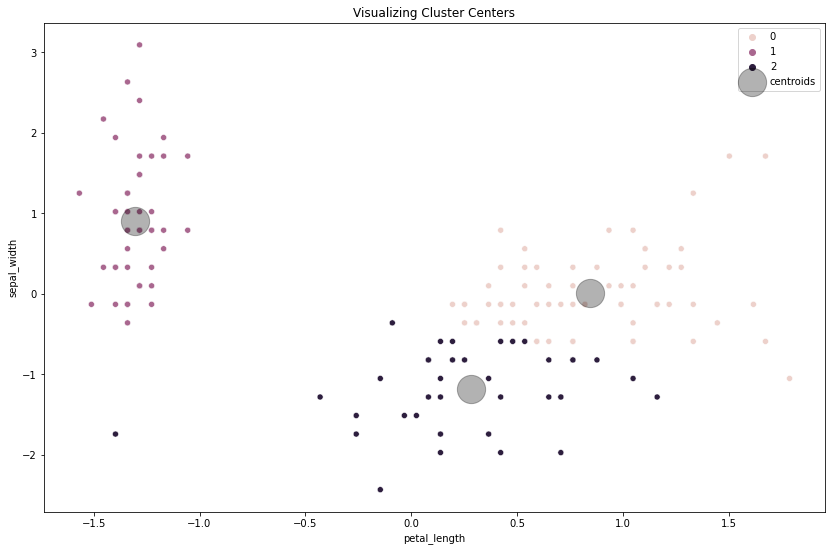

In [13]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [14]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


In [15]:
# choosing K

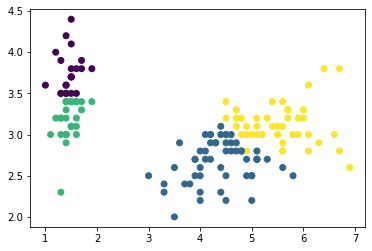

In [94]:
X = iris[['petal_length', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

plt.scatter(iris.petal_length, iris.sepal_width, c=iris.cluster)

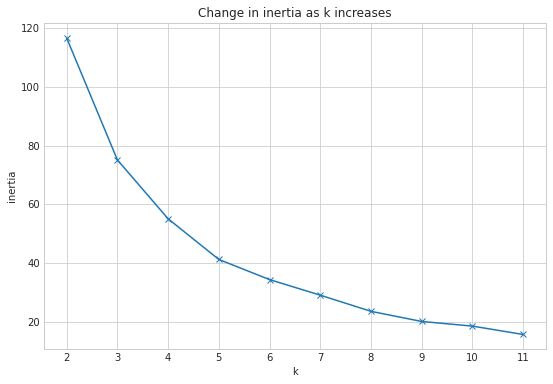

In [17]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

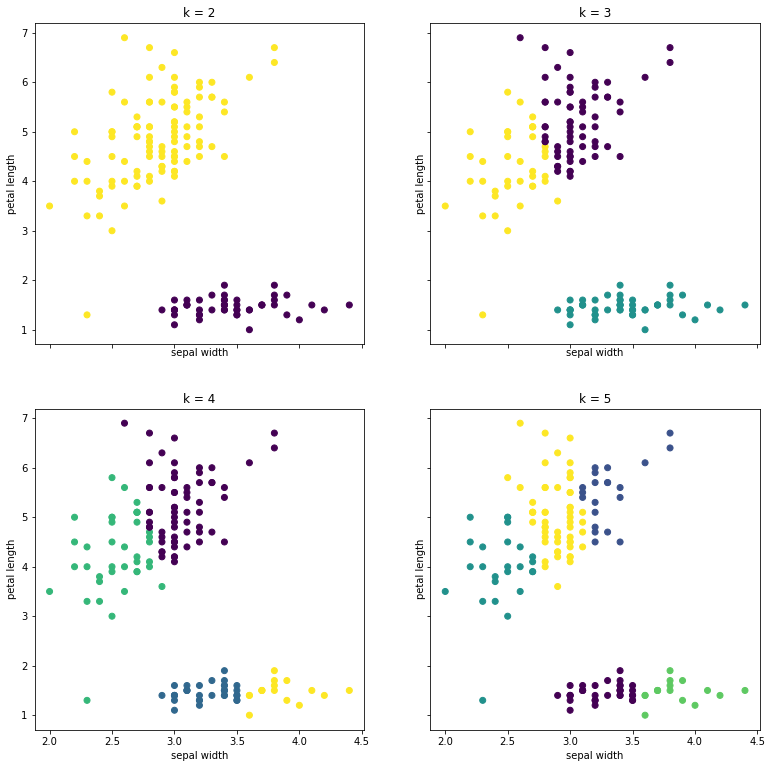

In [18]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal length')

In [124]:
# define the independent variables for k-means
# change features to 3 different features

X = iris[['sepal_width', 'petal_length', 'petal_width',]]
X.head()

,sepal_width,petal_length,petal_width
1,3.5,1.4,0.2
2,3.0,1.4,0.2
3,3.2,1.3,0.2
4,3.1,1.5,0.2
5,3.6,1.4,0.2


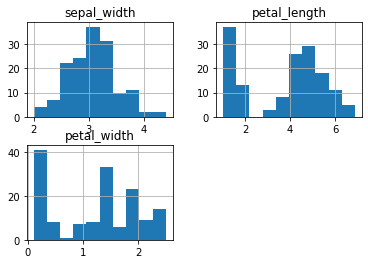

In [125]:
# look at distribution of x

X.hist();

In [126]:
# Scale the X before modeling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,sepal_width,petal_length,petal_width
1,1.019004,-1.340227,-1.315444
2,-0.131979,-1.340227,-1.315444
3,0.328414,-1.397064,-1.315444
4,0.098217,-1.283389,-1.315444
5,1.249201,-1.340227,-1.315444


In [127]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [128]:
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
128,6.1,3.0,4.9,1.8,virginica,0
56,5.7,2.8,4.5,1.3,versicolor,2
131,7.4,2.8,6.1,1.9,virginica,0
82,5.5,2.4,3.7,1.0,versicolor,2
116,6.4,3.2,5.3,2.3,virginica,0
93,5.8,2.6,4.0,1.2,versicolor,2
94,5.0,2.3,3.3,1.0,versicolor,2
101,6.3,3.3,6.0,2.5,virginica,0
98,6.2,2.9,4.3,1.3,versicolor,2
14,4.3,3.0,1.1,0.1,setosa,1


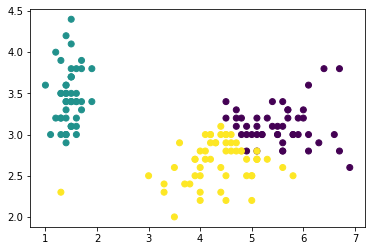

In [129]:
plt.scatter(iris.petal_length, iris.sepal_width, c=iris.cluster)

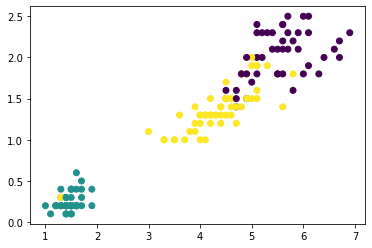

In [130]:
plt.scatter(iris.petal_length, iris.petal_width, c=iris.cluster)

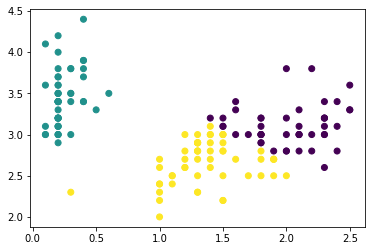

In [131]:
plt.scatter(iris.petal_width, iris.sepal_width, c=iris.cluster)

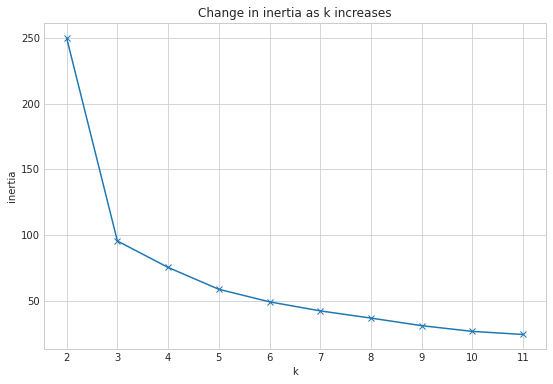

In [134]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

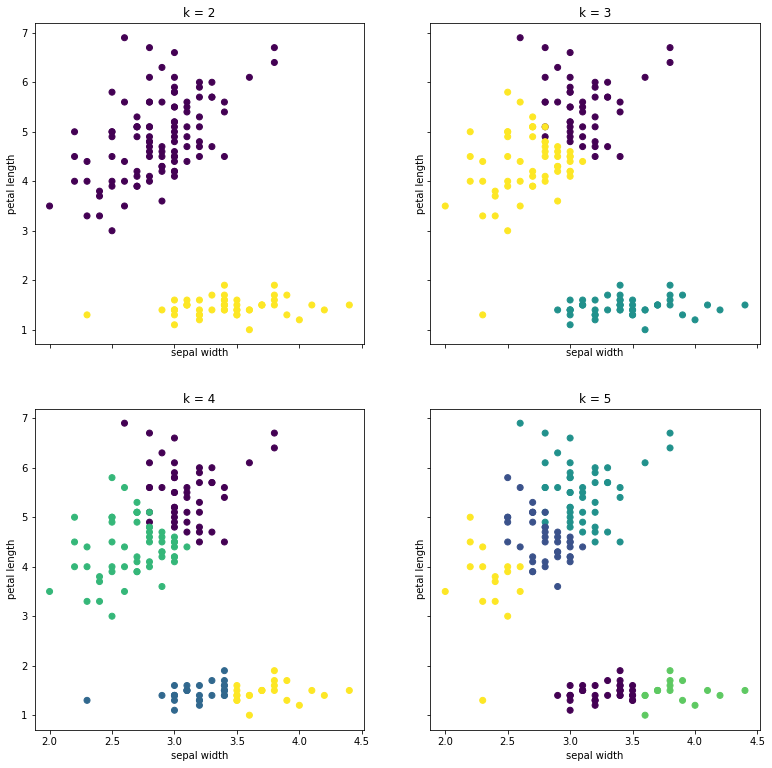

In [138]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal length')
    

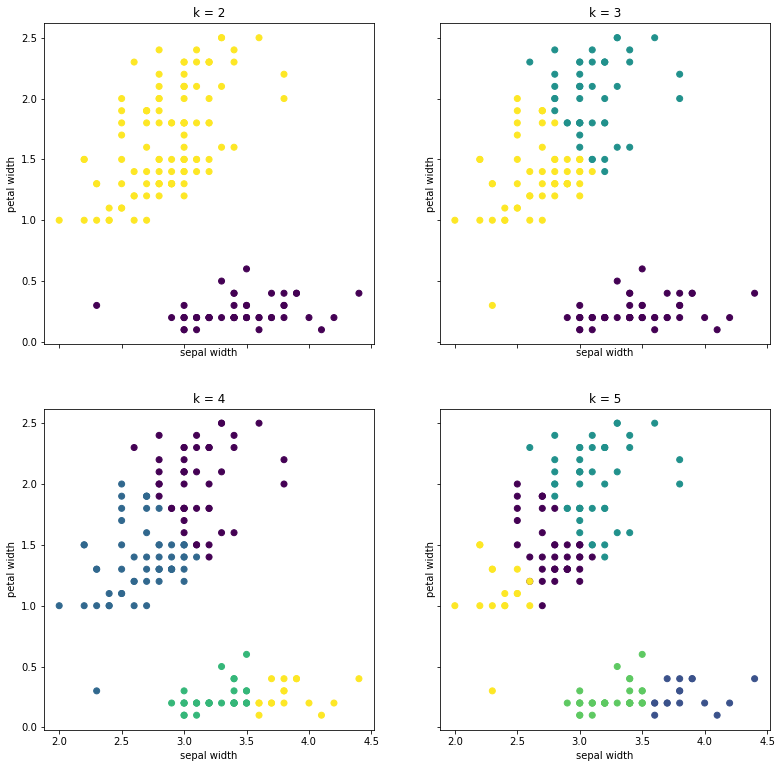

In [139]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')
    

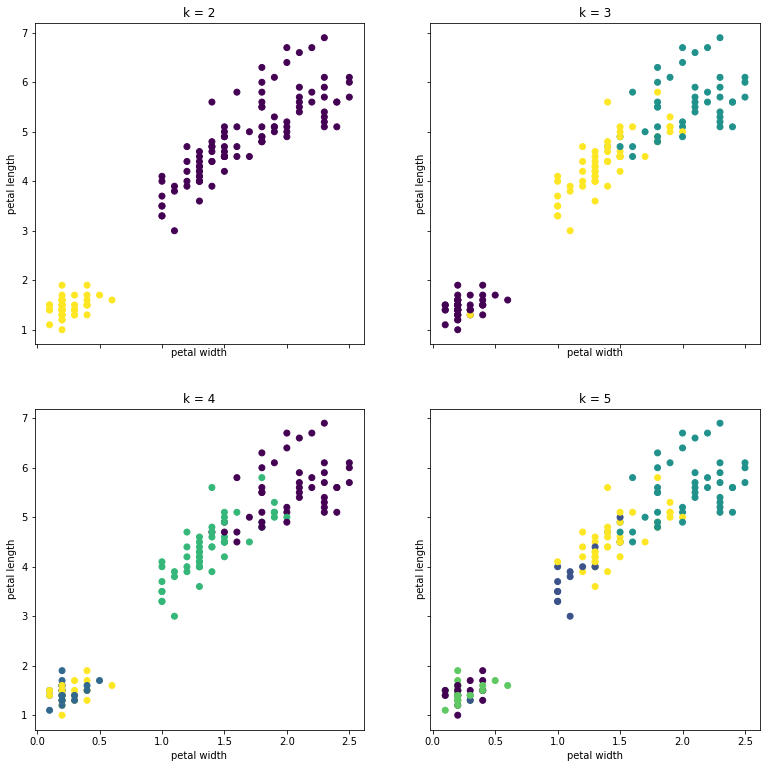

In [140]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='petal length')
    

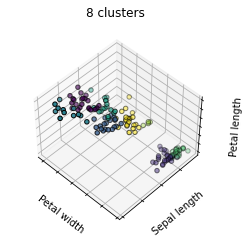

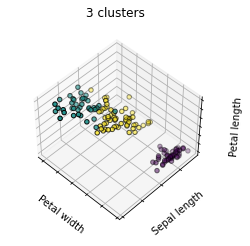

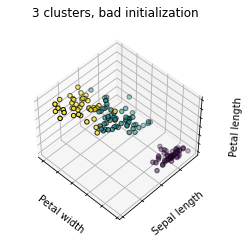

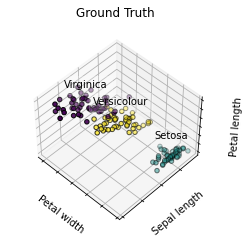

In [201]:
# Code from sklearn docs showing 3D graphs of iris clustering: 
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [210]:
# Shouldn't use encoded gender as feature. 
# Did modeling with all features but would be much more useful without. 
# Can the do hue or col on encoded gender in visualizations for added clarity. 
# Useful features would be 'annual_income' and 'spending_score', but could also include age. 
# KMeans does better with continuous data. 
# Ordinal columns can be fine, however encoded columns can really skew clusters as we can see below.
# State the takeaways from clustering (labeling what each cluster is representing).
# Rename clusters to human helpful labels like 
# If english label is insightful enough we can use is as target variable in classification 
# Use statistical tests on clusters to make sure they really are predictive

In [55]:
# import env to read from SQL DB
import env
# import mall dataset
# SQL query:
db_name = "mall_customers"
query = 'SELECT * FROM customers'

url  = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db_name}'
df = pd.read_sql(query, url, index_col="customer_id")

In [56]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [57]:
# Encode gender
df.gender = df.gender.apply(lambda x: 1 if x == "Female" else 0)

In [58]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [59]:
# split data
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,54,47,59
49,1,29,40,42
25,1,54,28,14
137,1,44,73,7
177,0,58,88,15


In [60]:
# Start w/ empty copies to retain the original splits
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()


In [61]:
# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["gender"]).columns.tolist()


In [62]:
train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

In [63]:
# Add back in the gender column to the dataframes
train_scaled["gender"] = train.gender.copy()
validate_scaled["gender"] = validate.gender.copy()
test_scaled["gender"] = test.gender.copy()


In [64]:
train_scaled.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,0.692308,0.262295,0.617021
49,1,0.211538,0.204918,0.436170
25,1,0.692308,0.106557,0.138298
137,1,0.500000,0.475410,0.063830
177,0,0.769231,0.598361,0.148936


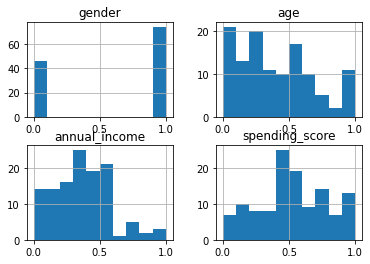

In [65]:
train_scaled.hist();

In [66]:
X = train_scaled

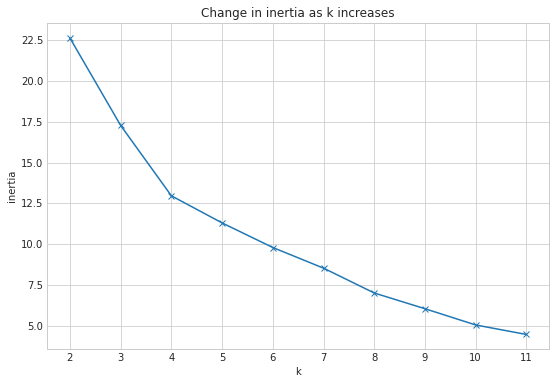

In [67]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [68]:
# 4 looks like a good number for K

In [69]:
# Fit K-Means

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,0.692308,0.262295,0.617021,2
49,1,0.211538,0.204918,0.436170,0
25,1,0.692308,0.106557,0.138298,2
137,1,0.500000,0.475410,0.063830,2
177,0,0.769231,0.598361,0.148936,1


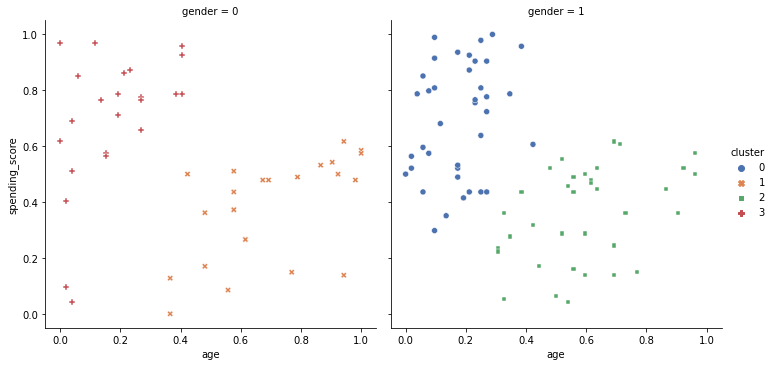

In [70]:
sns.relplot(x="age", y="spending_score", style="cluster", hue="cluster", col="gender", palette="deep",
            data=train_scaled)


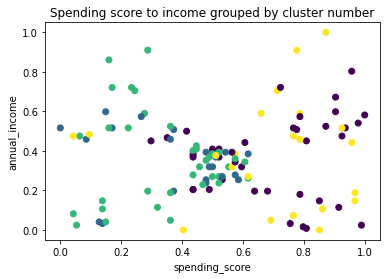

In [71]:

plt.title("Spending score to income grouped by cluster number")
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.show()


In [72]:
# try with a K of 5

In [73]:
# Fit K-Means

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,0.692308,0.262295,0.617021,1
49,1,0.211538,0.204918,0.436170,2
25,1,0.692308,0.106557,0.138298,1
137,1,0.500000,0.475410,0.063830,1
177,0,0.769231,0.598361,0.148936,0


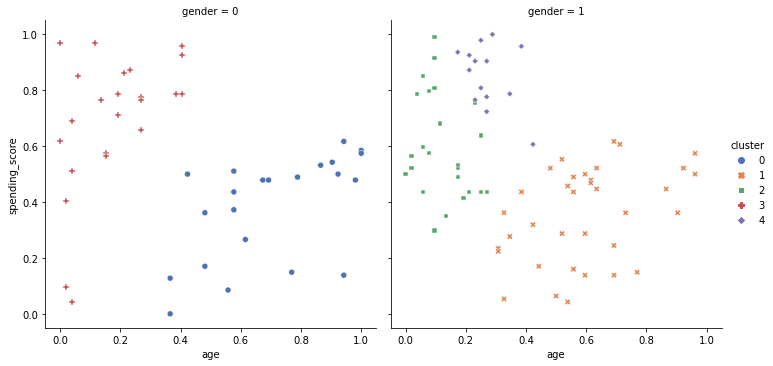

In [74]:
sns.relplot(x="age", y="spending_score", style="cluster", hue="cluster", col="gender", palette="deep",
            data=train_scaled)


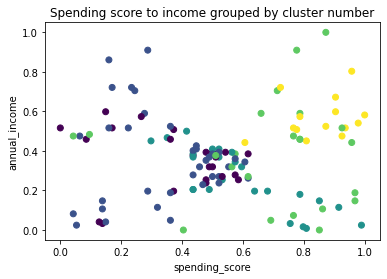

In [75]:

plt.title("Spending score to income grouped by cluster number")
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.show()

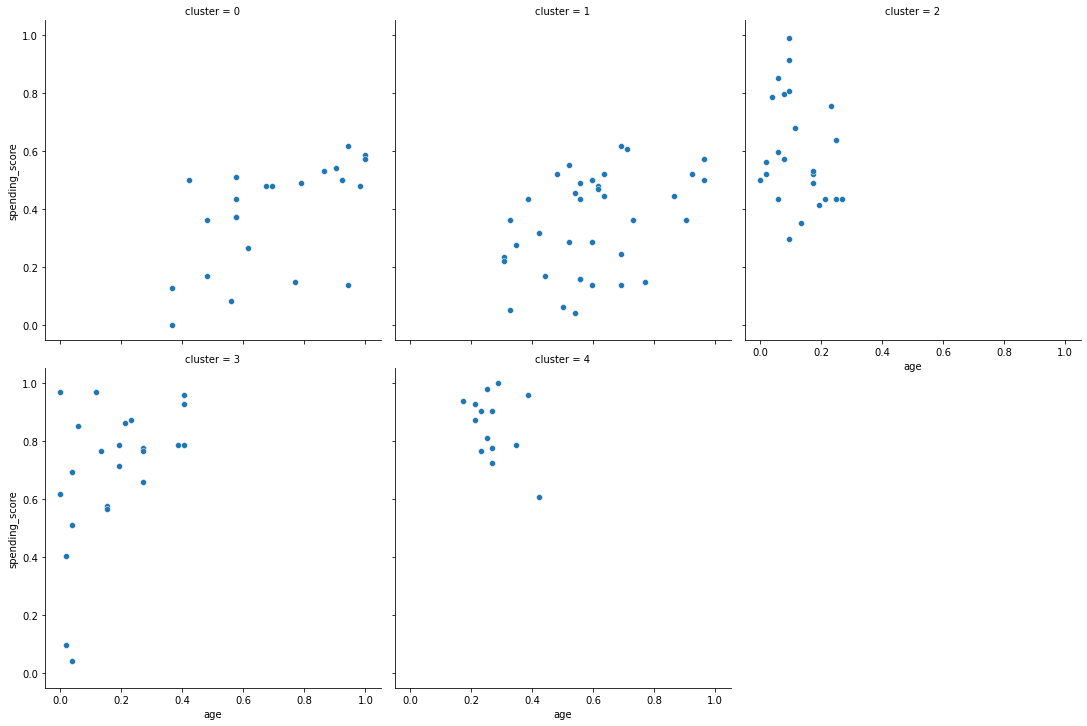

In [76]:
sns.relplot(x="age", y="spending_score", col="cluster", col_wrap=3, data=train_scaled)


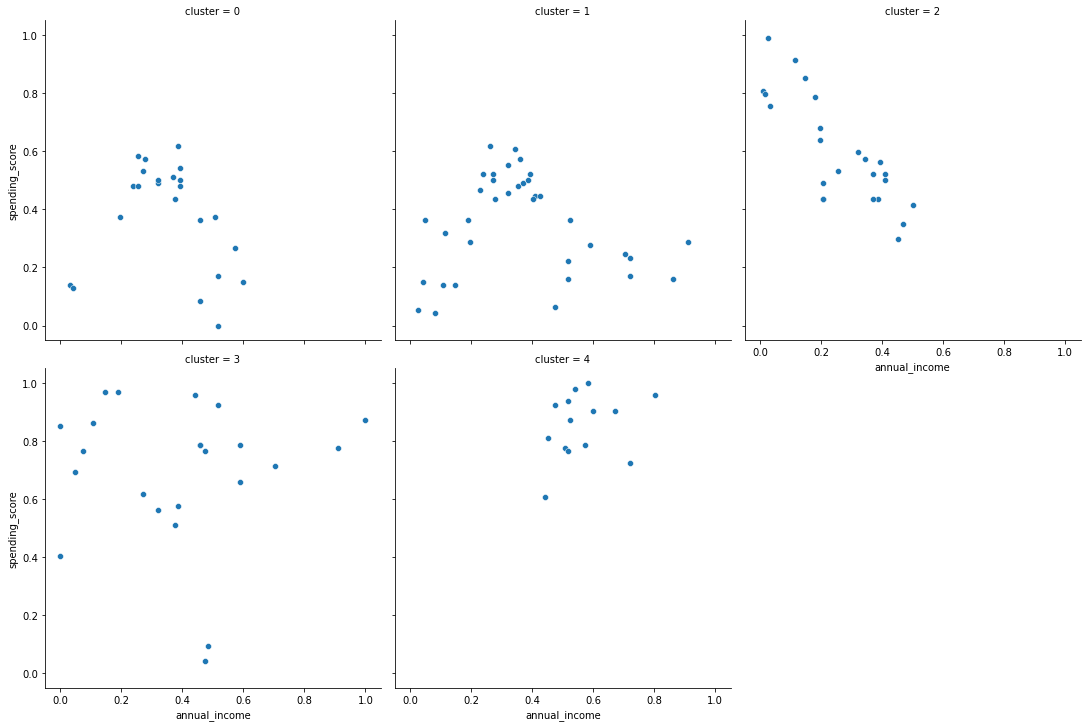

In [77]:
sns.relplot(x="annual_income", y="spending_score", col="cluster", col_wrap=3, data=train_scaled)

3. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

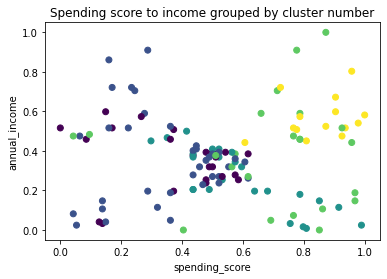

In [86]:

plt.title("Spending score to income grouped by cluster number")
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.show()

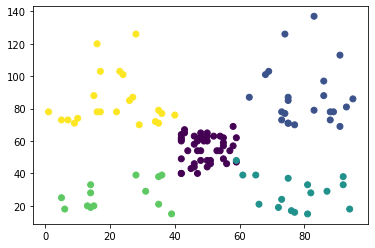

In [80]:

# Fit K-Means
X = train
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.labels_
plt.scatter(train.spending_score, train.annual_income, c=train.cluster)

With the mall dataset, the unscaled data is better defined than the scaled data

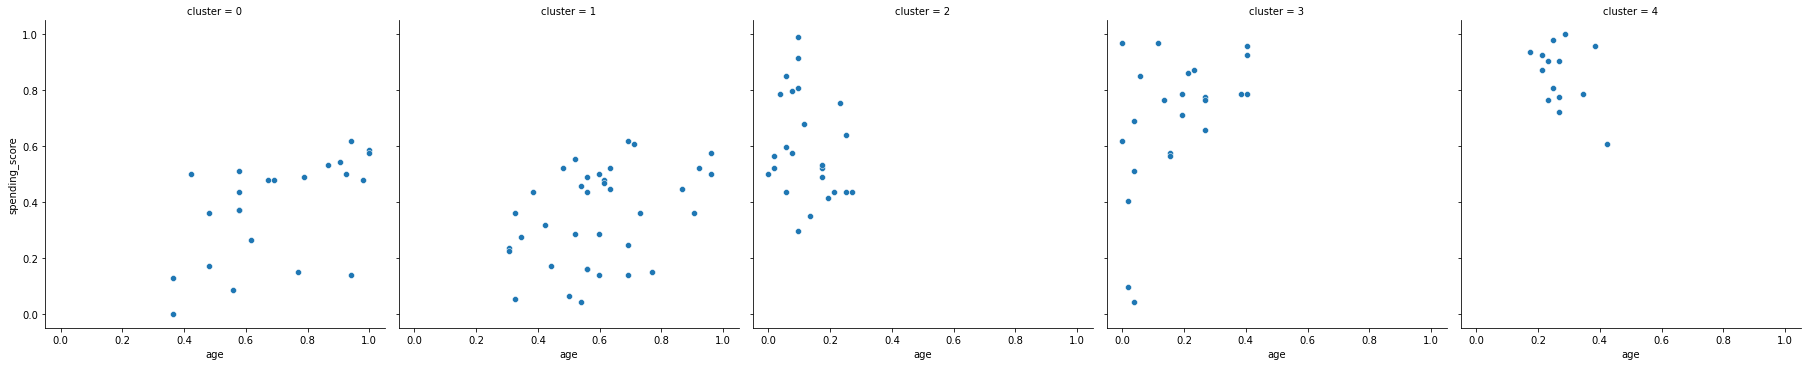

In [114]:
# age/spending_score scaled
sns.relplot(x="age", y="spending_score", col="cluster", data=train_scaled)

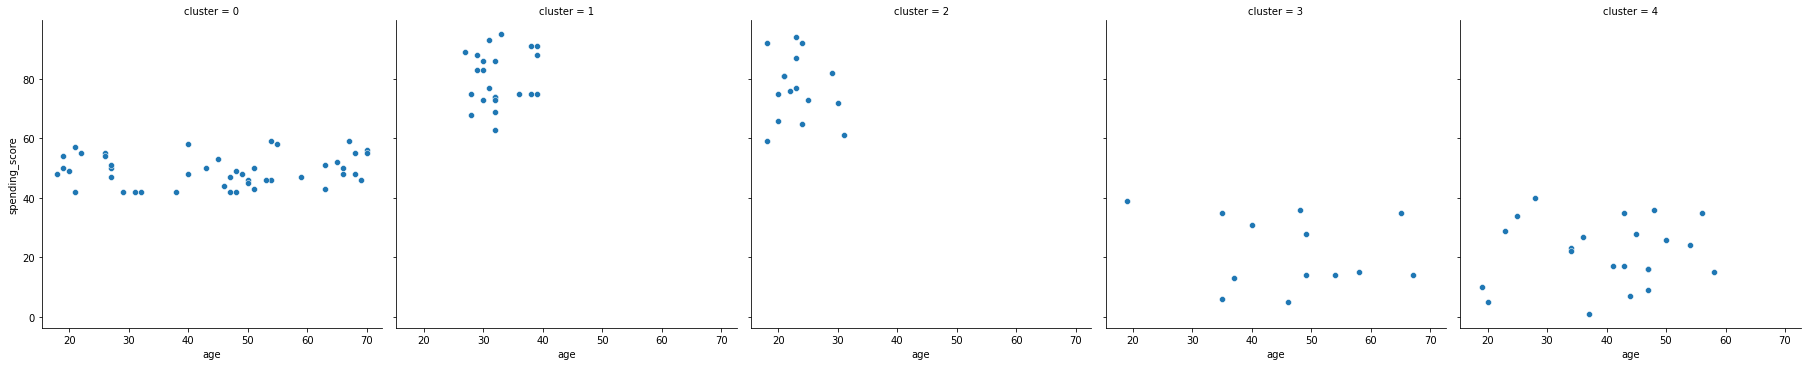

In [113]:
# age/spending_score unscaled
sns.relplot(x="age", y="spending_score", col="cluster", data=train)

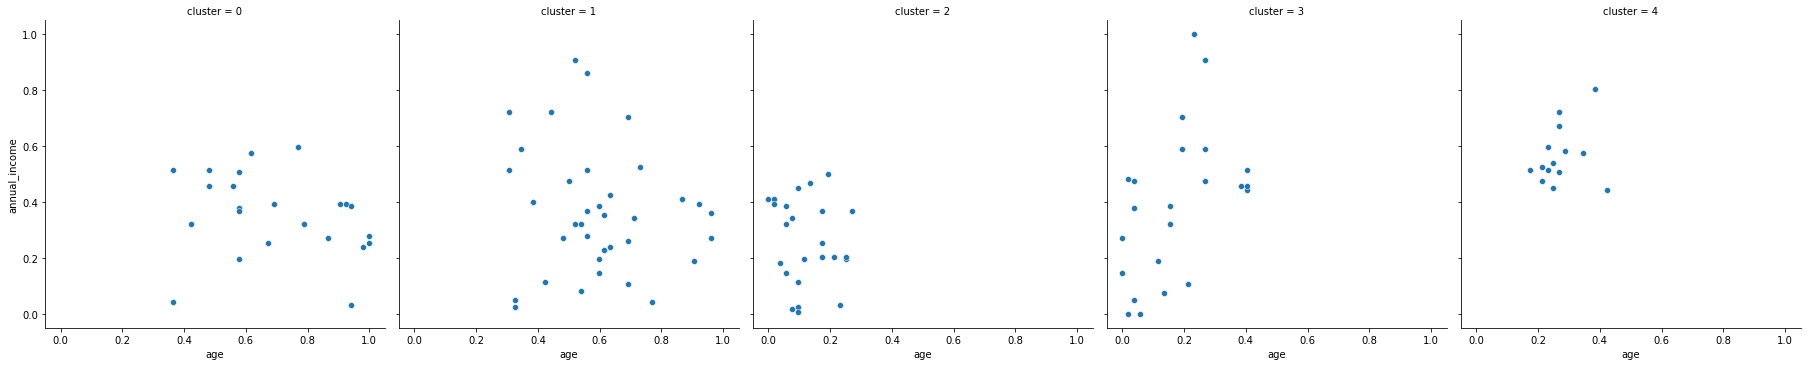

In [112]:
# age/annual_income scaled
sns.relplot(x="age", y="annual_income", col="cluster", data=train_scaled)

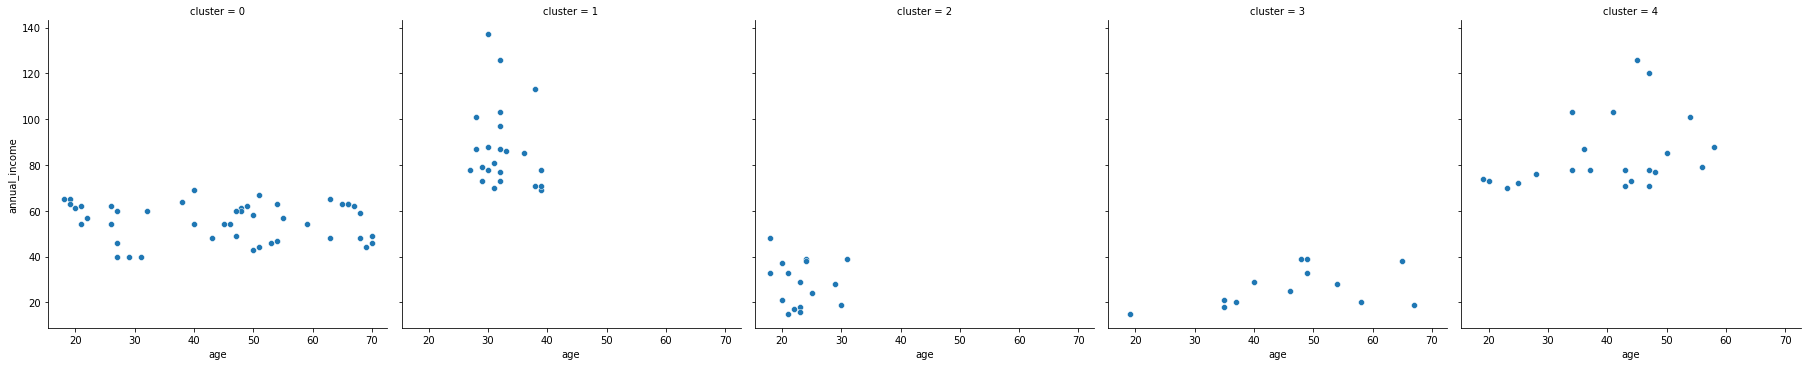

In [111]:
# age/annual_income uncaled
sns.relplot(x="age", y="annual_income", col="cluster", data=train)

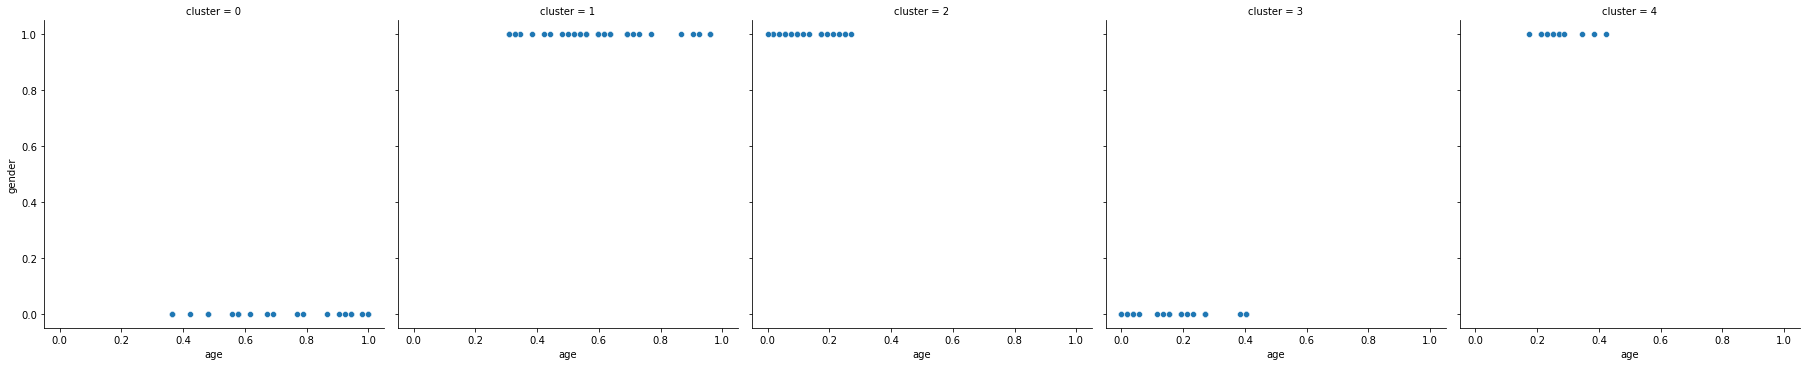

In [109]:
# age/gender scaled
sns.relplot(x="age", y="gender", col="cluster", data=train_scaled)

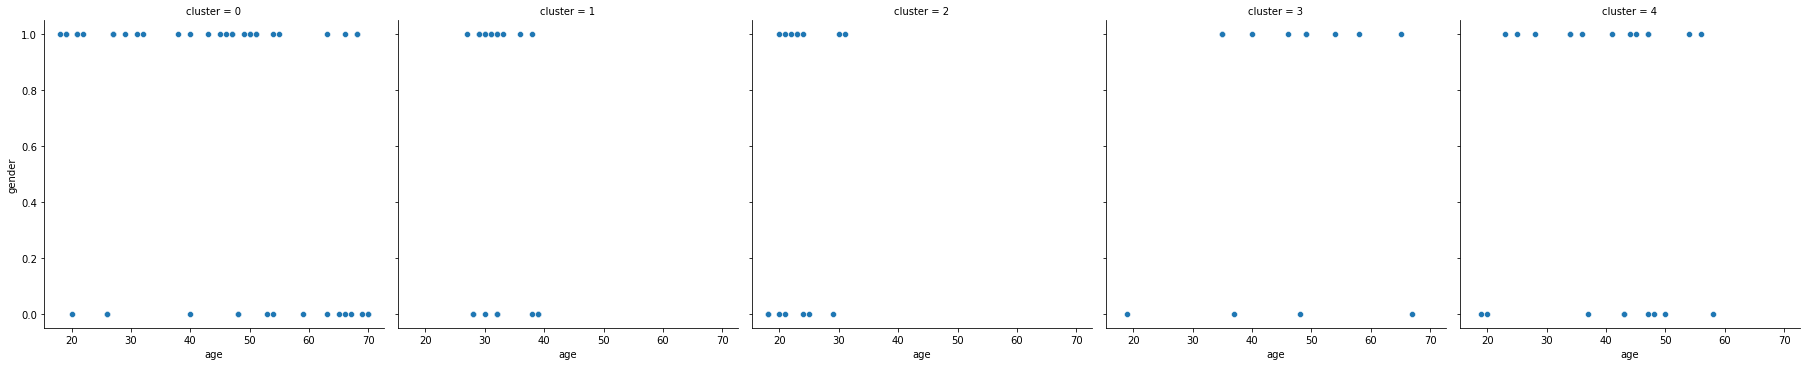

In [110]:
# age/gender unscaled
sns.relplot(x="age", y="gender", col="cluster", data=train)

In [147]:
train.describe()

,gender,age,annual_income,spending_score,cluster
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.616667,38.900000,60.166667,50.816667,1.516667
std,0.488237,14.637008,25.937330,24.240040,1.533839
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,27.000000,40.000000,35.000000,0.000000
50%,1.000000,36.500000,61.500000,49.500000,1.000000
75%,1.000000,49.000000,77.000000,73.000000,3.000000
max,1.000000,70.000000,137.000000,95.000000,4.000000


Bonus
    
    a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
   
    b) Visualize the data and guess the number and shape of the clusters.
    
    c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
   
    d) Repeat the step above but with scaled data.
    
    c) Write down the takeaways from this exercise.




In [145]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1PcdDOAozw9xNzwB_fJRPWhtdPXyunanaJbjlmunQddw/edit#gid=0'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

cluster_data = pd.read_csv(csv_export_url)
cluster_data.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


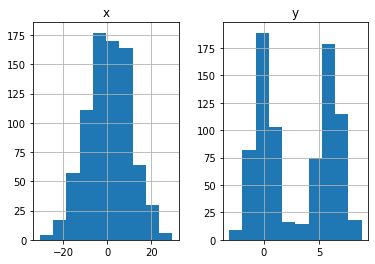

In [146]:
cluster_data.hist();

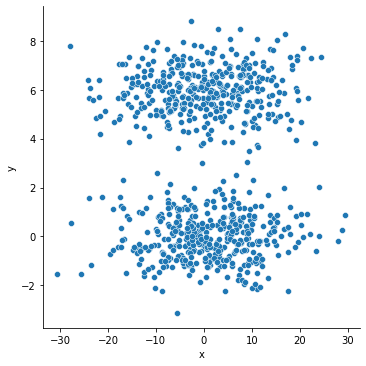

In [152]:
sns.relplot(x='x', y='y',data=cluster_data)

In [153]:
# Fit K-Means

kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster_data)

cluster_data['cluster'] = kmeans.labels_

cluster_data.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0


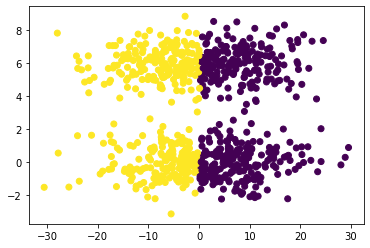

In [155]:
plt.scatter(cluster_data.x, cluster_data.y, c=cluster_data.cluster);

In [202]:
# In this case we have enough domain knowledge and imediate knowledge to know K should be 2. 
# No need to do elbow test or visualize other K values. 

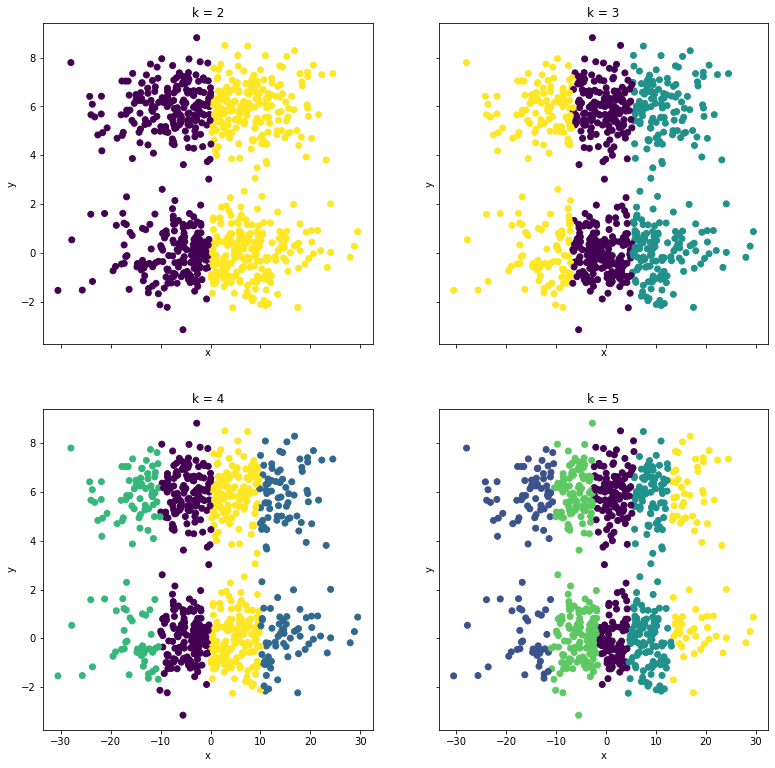

In [158]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(cluster_data).predict(cluster_data)
    ax.scatter(cluster_data.x, cluster_data.y, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='x', ylabel='y')
    

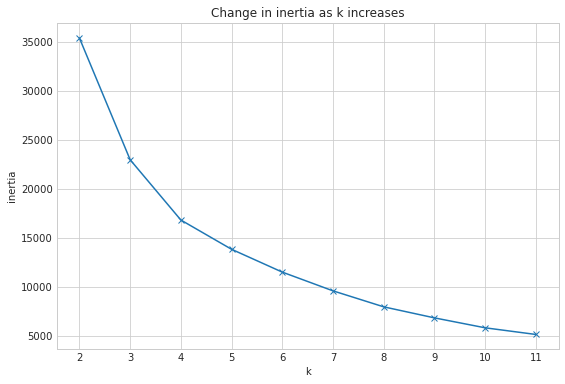

In [160]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(cluster_data).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [176]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1PcdDOAozw9xNzwB_fJRPWhtdPXyunanaJbjlmunQddw/edit#gid=0'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

cluster_data = pd.read_csv(csv_export_url)
cluster_data.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [177]:
scaler = StandardScaler().fit(cluster_data)
cluster_data_scaled = pd.DataFrame(scaler.transform(cluster_data), columns= cluster_data.columns).set_index([cluster_data.index.values])
cluster_data_scaled.head()

,x,y
0,-0.419211,-0.904027
1,-0.821099,-0.368472
2,-0.708466,-0.920978
3,0.729546,-0.756937
4,1.694464,-0.833249


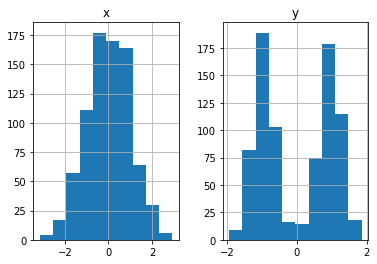

In [178]:
cluster_data_scaled.hist();

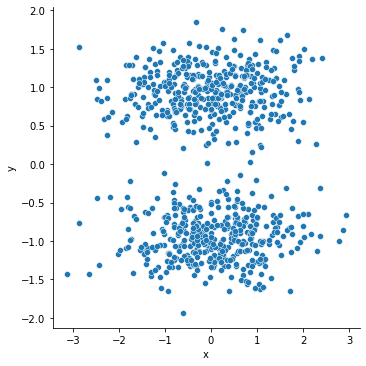

In [179]:
sns.relplot(x='x', y='y',data=cluster_data_scaled)

In [180]:
# Fit K-Means

kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster_data_scaled)

cluster_data_scaled['cluster'] = kmeans.labels_

cluster_data_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,1
1,-0.821099,-0.368472,1
2,-0.708466,-0.920978,1
3,0.729546,-0.756937,1
4,1.694464,-0.833249,1


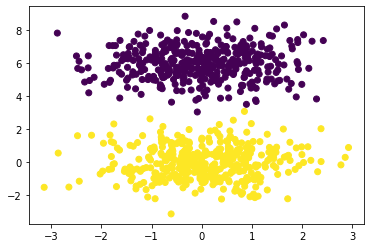

In [181]:
plt.scatter(cluster_data_scaled.x, cluster_data.y, c=cluster_data_scaled.cluster);

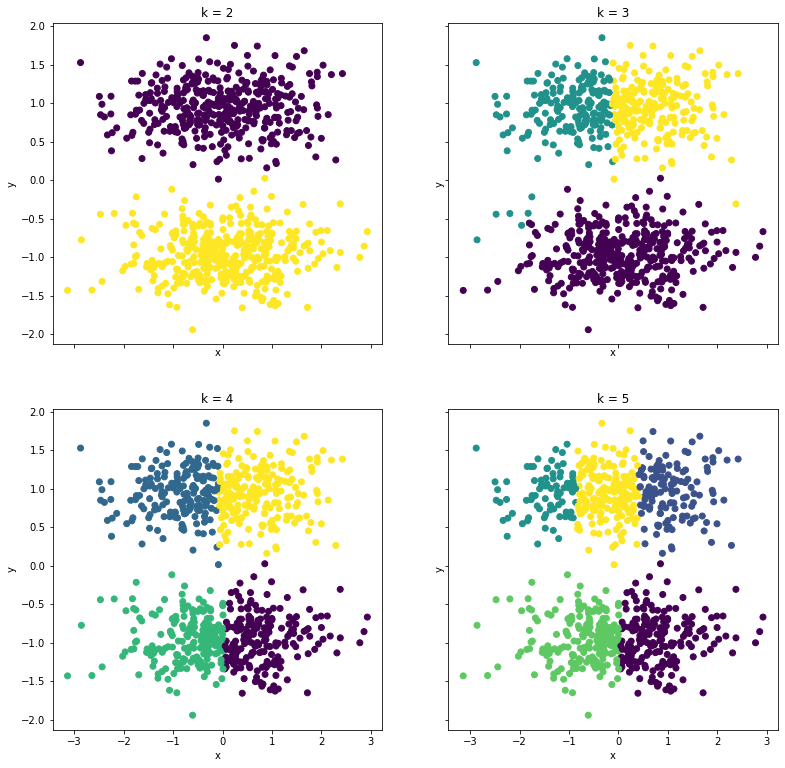

In [182]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(cluster_data_scaled).predict(cluster_data_scaled)
    ax.scatter(cluster_data_scaled.x, cluster_data_scaled.y, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='x', ylabel='y')
    

In [186]:
# define the independent variables for k-means

X = cluster_data_scaled[['x', 'y']]
X.head()

,x,y
0,-0.419211,-0.904027
1,-0.821099,-0.368472
2,-0.708466,-0.920978
3,0.729546,-0.756937
4,1.694464,-0.833249


In [187]:
kmeans.cluster_centers_

array([[-0.04074052,  0.95109244],
       [ 0.04074052, -0.95109244]])

In [188]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,x,y
0,-0.040741,0.951092
1,0.040741,-0.951092


In [189]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,6.713043,5.526087
1,5.016327,1.465306
2,5.852727,4.321818


In [190]:
# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

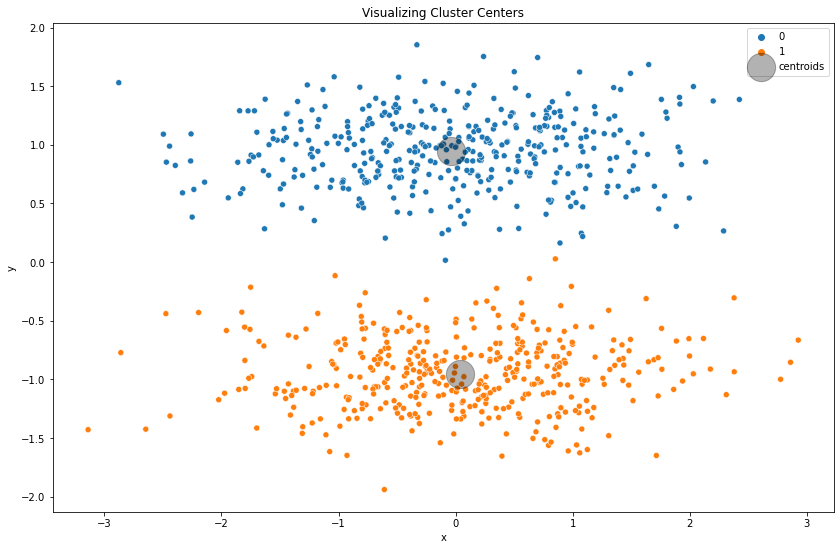

In [193]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y ='y', data = cluster_data_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'x', y = 'y',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();